<a href="https://colab.research.google.com/github/Anishkumarpandey757/DL-projects-main/blob/main/dl2dogvscattransferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer learning is a machine learning technique where a model trained on a specific task is reused as the starting point for a model on a second task. This is done by transferring the knowledge that the first model has learned to the second model.

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


importing the data set from kaggle


In [ ]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls

sample_data


In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the data set is extracted')


FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs-vs-cats.zip'

In [ ]:
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the data set is extracted')

the data set is extracted


In [ ]:
import os #counting files in train folder
path , dirs , files = next(os.walk('/content/train'))
file_count = len(files)
print(file_count)

25000


In [ ]:
#printing name of images
files_names = os.listdir('/content/train')
print(files_names)

['cat.4624.jpg', 'cat.2364.jpg', 'cat.1449.jpg', 'dog.7247.jpg', 'cat.635.jpg', 'cat.3877.jpg', 'cat.6013.jpg', 'cat.12459.jpg', 'dog.5586.jpg', 'cat.10732.jpg', 'dog.11877.jpg', 'dog.7902.jpg', 'cat.7195.jpg', 'dog.3587.jpg', 'cat.8508.jpg', 'dog.7225.jpg', 'cat.6285.jpg', 'dog.9900.jpg', 'cat.10723.jpg', 'dog.5987.jpg', 'dog.10149.jpg', 'dog.6532.jpg', 'dog.3443.jpg', 'cat.7340.jpg', 'cat.6676.jpg', 'dog.8255.jpg', 'cat.2762.jpg', 'cat.9537.jpg', 'cat.7171.jpg', 'dog.2052.jpg', 'cat.8372.jpg', 'dog.5048.jpg', 'dog.348.jpg', 'dog.10321.jpg', 'cat.4359.jpg', 'cat.11647.jpg', 'dog.9213.jpg', 'cat.10426.jpg', 'dog.578.jpg', 'dog.1443.jpg', 'dog.2158.jpg', 'cat.1978.jpg', 'dog.1382.jpg', 'cat.5677.jpg', 'cat.9560.jpg', 'cat.11292.jpg', 'dog.5755.jpg', 'dog.6156.jpg', 'cat.9868.jpg', 'cat.5990.jpg', 'dog.12005.jpg', 'dog.3158.jpg', 'cat.9480.jpg', 'cat.11424.jpg', 'cat.9401.jpg', 'dog.272.jpg', 'dog.566.jpg', 'cat.2474.jpg', 'dog.8223.jpg', 'cat.5714.jpg', 'dog.7889.jpg', 'cat.11190.jpg', 

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv_imshow

<function matplotlib.pyplot.show(close=None, block=None)>

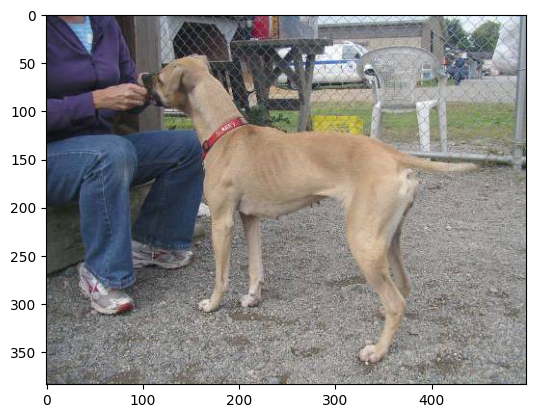

In [ ]:
img = mpimg.imread('/content/train/dog.5974.jpg')
imgplt = plt.imshow(img)
plt.show

In [ ]:
file_names = os.listdir('/content/train/')
dog_count  = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('no of dog',dog_count)
print('no of cat',cat_count)

no of dog 12500
no of cat 12500


In [ ]:
#resizing images
#creating a new directory
os.mkdir('/content/image resized/')


In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'
for i in  range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)


creating labels for dogs and cats

In [ ]:
labels=[]
filenames = os.listdir('/content/image resized')
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1003  997]


In [ ]:
#coverting all the resized images to numpy arrays
import cv2
import glob



In [ ]:
image_directory = '/content/image resized/'
image_extention = ['png','jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extention]#filecheckpngjpg
dog_cat_images = np.asarray([cv2.imread(file) for file in files ])

In [ ]:
print(dog_cat_images)

[[[[250 253 255]
   [250 253 255]
   [250 253 255]
   ...
   [196 186 169]
   [189 179 162]
   [178 168 151]]

  [[252 253 255]
   [252 253 255]
   [252 253 255]
   ...
   [183 173 156]
   [186 176 159]
   [187 177 160]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [183 173 156]
   [187 177 160]
   [191 181 164]]

  ...

  [[ 59  75 122]
   [ 58  74 121]
   [ 55  71 118]
   ...
   [252 254 254]
   [251 253 253]
   [251 253 253]]

  [[ 22  37  86]
   [ 22  37  86]
   [ 24  39  88]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]

  [[ 45  60 109]
   [ 41  56 105]
   [ 38  53 102]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]]


 [[[198 219 220]
   [191 212 213]
   [189 211 209]
   ...
   [187 195 195]
   [187 194 197]
   [187 194 197]]

  [[194 216 214]
   [189 211 209]
   [189 211 209]
   ...
   [187 194 197]
   [187 194 197]
   [187 194 197]]

  [[192 213 210]
   [189 210 207]
   [191 212 209]
   ...
   [188 194 199]
   [187 193 198]
   [187 193

In [ ]:
#train test split
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train , X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)


In [ ]:
#1600 training images
#400 test images
#scaling
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
#building the neural network using pretrained model
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
!pip install tensorflow-hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_3 (Dense)             (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 77s 1s/step - loss: 0.1954 - acc: 0.9269
Epoch 2/5
50/50 [==============================] - 76s 2s/step - loss: 0.0584 - acc: 0.9812
Epoch 3/5
50/50 [==============================] - 71s 1s/step - loss: 0.0400 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 73s 1s/step - loss: 0.0299 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0208 - acc: 0.9944


In [ ]:
score , acc = model.evaluate(X_test_scaled,Y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0665 - acc: 0.9700
Test Loss= 0.06650588661432266
Test Accuracy= 0.9700000286102295


In [ ]:
#predictive system
input_image_path = input('Path of the image to be predictiction : ')
input_image = cv2.imread(input_image_path)

input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
if input_pred_label == 0:
  print('cat')
else:
  print('dog')

Path of the image to be predictiction : /content/jpg.png
1/1 [==============================] - 1s 672ms/step
dog
